<a href="https://colab.research.google.com/github/arofenitra/Scientific-Computing/blob/main/image_processing/anisotropic_diffusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Definition

Formally, let ${\displaystyle \Omega \subset \mathbb {R} ^{2}}$ denote a subset of the plane and ${\displaystyle I(\cdot ,t):\Omega \rightarrow \mathbb {R} }$ be a family of gray scale images.
 ${\displaystyle I(\cdot ,0)}$ is the input image. Then anisotropic diffusion is defined as
$$
 {\displaystyle {\frac {\partial I}{\partial t}}=\operatorname {div} \left(c\left(\|\nabla I\|\right)\nabla I\right)=\nabla c\cdot \nabla I+c\left(\|\nabla I\|\right)\,\Delta I}$$
 Where ${\displaystyle c\left(\|\nabla I\|\right)}$ is the diffusion coefficient.
 Some research (Perona and Malik) proposed diffusion coefficient as :
$$ {\displaystyle c\left(\|\nabla I\|\right)=e^{-\left(\|\nabla I\|/K\right)^{2}}}$$
and
$${\displaystyle c\left(\|\nabla I\|\right)={\frac {1}{1+\left({\frac {\|\nabla I\|}{K}}\right)^{2}}}}$$
the constant K controls the sensitivity to edges and is usually chosen experimentally or as a function of the noise in the image.


### Edge enhancement
We want to find $c\left(\|\nabla I\|\right)$ such that the sharp boundaries is maintained.
- **case of one dimension**:

$$
 {\displaystyle {\frac {\partial I}{\partial t}}=\operatorname {div} \left(c\left(\|\nabla I\|\right)\nabla I\right)=\nabla c\cdot \nabla I+c\left(\|\nabla I\|\right)\,\Delta I}$$


 $$\frac{∂I}{∂t}=\frac{∂c}{∂x}\frac{∂I}{∂x}+c\frac{∂^2I}{∂x^2}$$
 Consider $ϕ(∂_xI)=c(|∂_xI|)∂_xI$ and we assume that $c>0$. We have
 $$∂_t(∂_xI)=∂_x(∂_tI)=∂_x(∂_x(c∂_xI))=∂_{xx}ϕ(∂_xI)=ϕ^{"}(∂_xI)∂_{xx}^2I+ϕ^{'}(∂_xI)∂_{xxx}I$$
 For some edge that have orientation (and $∂_xI>0$), $∂_{xx}I=0$ and $∂_{xxx}I<0$ at the point of inflexion, so that
t the slope of the edge will increase for $φ'(∂_xI) < 0$ and decrease for $φ'(∂_xI) > 0$. So at some $τ :∂xu<τ$ we will have edge blurring and edge sharpening will occur otherwise.
- **case of 2 dimension**:
We have from the above reasoning, at some $τ$ :
$$\begin{cases}\phi'(|∇I|)>0 & |\nabla I|<τ \\\phi'(|∇I|)<0 & \text{otherwise} \end{cases}$$
We can choose one of the following that satisfy the above :
$$ {\displaystyle c\left(\|\nabla I\|\right)=e^{-\left(\|\nabla I\|/K\right)^{2}}}$$
and
$${\displaystyle c\left(\|\nabla I\|\right)={\frac {1}{1+\left({\frac {\|\nabla I\|}{K}}\right)^{2}}}}$$

### Finite Difference Methods
We can use forward backward and central difference, method to simulate is numerically. The example of forward one is listed bellow.

$$\frac{∂}{∂t}I(x_i,y_j,t_k)≈\frac{1}{Δt}(I(x_i,y_j,t_{k+1})-I(x_i,y_j,t_{k})$$
$$\frac{∂}{∂x}I(x_i,y_j,t_k)≈\frac{1}{Δx}(I(x_{i+1},y_j,t_{k})-I(x_i,y_j,t_{k})$$
$$\frac{∂}{∂y}I(x_i,y_j,t_k)≈\frac{1}{Δy}(I(x_{i},y_{j+1},t_{k})-I(x_i,y_j,t_{k})$$
$$\frac{∂^2}{∂x^2}I(x_i,y_j,t_k)≈\frac{1}{Δx^2}(I(x_{i+1},y_j,t_{k})-2I(x_i,y_j,t_{k})+I(x_{i-1},y_j,t_k)$$
$$\frac{∂^2}{∂y^2}I(x_i,y_j,t_k)≈\frac{1}{Δx^2}(I(x_{i},y_{j+1},t_{k})-2I(x_i,y_j,t_{k})+I(x_{i},y_{j-1},t_k)$$
We can have the folowing
$$c(|∇I|^2)∇I=c\cdot \left[\frac{∂I}{∂x},\frac{∂I}{∂y}\right]^T$$
$$≈c(|∇I_{i,j}|^2)\left[\frac{1}{Δx}(I_{i+0.5,j}-I_{i-0.5,j})\; , \;  \frac{1}{Δy}(I_{i,j+0.5}-I_{i,j-0.5})\right]^T$$
Hence :
$$div(c(|∇I|^2)∇I)=\left[\frac{∂}{∂x}, \frac{∂}{∂y}\right]\cdot \left(c(|∇I|^2)∇I \right)$$
$$≈\frac{∂}{∂y}\left[c(|∇I_{i,j}|^2)\frac{1}{Δy}(I_{i,j+0.5}-I_{i,j-0.5}) \right]+\frac{∂}{∂x}\left[c(|∇I_{i,j}|^2)\frac{1}{Δx}(I_{i+0.5,j}-I_{i-0.5,j}) \right]$$
$$≈\frac{1}{\Delta y}\left[c(|∇I_{i,j+0.5}|^2)\frac{1}{Δy}(I_{i,j+1}-I_{i,j})-c(|∇I_{i,j-0.5}|^2)\frac{1}{Δy}(I_{i,j}-I_{i,j-1}) \right]+
\frac{1}{\Delta x}\left[c(|∇I_{i+0.5,j}|^2)\frac{1}{Δx}(I_{i+1,j}-I_{i,j})-c(|∇I_{i-0.5,j}|^2)\frac{1}{Δx}(I_{i,j}-I_{i-1,j}) \right]$$
We can take average so that
$$c(|∇I_{i+0.5,j}|^2)≈\frac{1}{2}\left( c(|∇I_{i+1,j}|^2)+c(|∇I_{i,j}|^2)\right)$$
$$c(|∇I_{i-0.5,j}|^2)≈\frac{1}{2}\left( c(|∇I_{i,j}|^2)+c(|∇I_{i-1,j}|^2)\right)$$
$$c(|∇I_{i,j+0.5}|^2)≈\frac{1}{2}\left( c(|∇I_{i,j+1}|^2)+c(|∇I_{i,j}|^2)\right)$$
$$c(|∇I_{i,j-0.5}|^2)≈\frac{1}{2}\left( c(|∇I_{i,j}|^2)+c(|∇I_{i,j-1}|^2)\right)$$
For the uniform grid, $Δx=Δy=1$, we can have the implicit $I_{i,j,k}=I(x_i,y_j,t_k)$:

$$I_{i,j,k+1}=I_{i,j,k}+\frac{Δt}{2\Delta y^2}\left[\left( c(|∇I_{i,j+1}|^2)+c(|∇I_{i,j}|^2)\right)(I_{i,j+1}-I_{i,j})-\left( c(|∇I_{i,j}|^2)+c(|∇I_{i,j-1}|^2)\right)(I_{i,j}-I_{i,j-1}) \right]+
\frac{Δt}{2\Delta x^2}\left[\left( c(|∇I_{i+1,j}|^2)+c(|∇I_{i,j}|^2)\right)(I_{i+1,j}-I_{i,j})-\left( c(|∇I_{i,j}|^2)+c(|∇I_{i-1,j}|^2)\right)(I_{i,j}-I_{i-1,j}) \right]$$
Where using central difference : $$ΔI_{i,j}=\left[\frac{1}{2\Delta x}\left(I_{i+1}-I_{i-1} \right),\left(I_{j+1}-I_{j-1} \right) \frac{1}{2\Delta y}\right]^T$$
$$|ΔI_{i,j}|^2=\frac{1}{4\Delta x^2}\left(I_{i+1}-I_{i-1} \right)^2+\left(I_{j+1}-I_{j-1} \right)^2 \frac{1}{4\Delta y^2}$$

### Another approach
Perona Malik is an ill problem, we can introduce kernel (gaussian kernel for example) to reduce the illness. So in that case, instead of $c(|∇I|^2)$, we will use $c(|∇(G*I)|^2)=c(|∇\tilde{I}|^2)$ for gaussian kernel $G_σ(x)=Cσ^{-0.5}\exp(-\frac{|x|}{4σ})$

3


In [ ]:
def Delta_I(I,i,j): #variation of image
    if 0<i<len(I) and 0<j<len(I[0]):

        return (I[i+1,:,:]-I[i-1])**2/4+(I[:,j+1,:]-I[:,j-1,:])**2/4

def dc_1(I,i,j,K):#gaussian diffusion coefficient
    return np.exp(-(Delta_I(I,i,j)/K)**2)
def dc_2(I,i,j,k,K):#cauchy diffusion coefficient
    return 1/(1+((Delta_I(I,i,j)/K)**2))
def anisotropic_diffusion1(I,i,j,k,K,dt):
    return anisotropic_diffusion1(I,i,j,k,K,dt)+dt/2*((Delta_I(I,i+1,j)+Delta_I(I,i,j))*(I[i+1,j,:]-I[i-1,j,:])-(Delta_I(I,i,j)+Delta_I(I,i-1,j))*(I[i,j,:]-I[i-1,j,:])+\
    (Delta_I(I,i,j+1)+Delta_I(I,i,j))*(I[i,j+1,:]-I[i,j-1,:])-(Delta_I(I,i,j)+Delta_I(I,i,j-1))*(I[i,j,:]-I[i,j-1,:]))


In [40]:
import imageio.v3 as imageio
import numpy as np
image=imageio.imread("lena_grey.jpeg")
import matplotlib.pylab as pyl




3


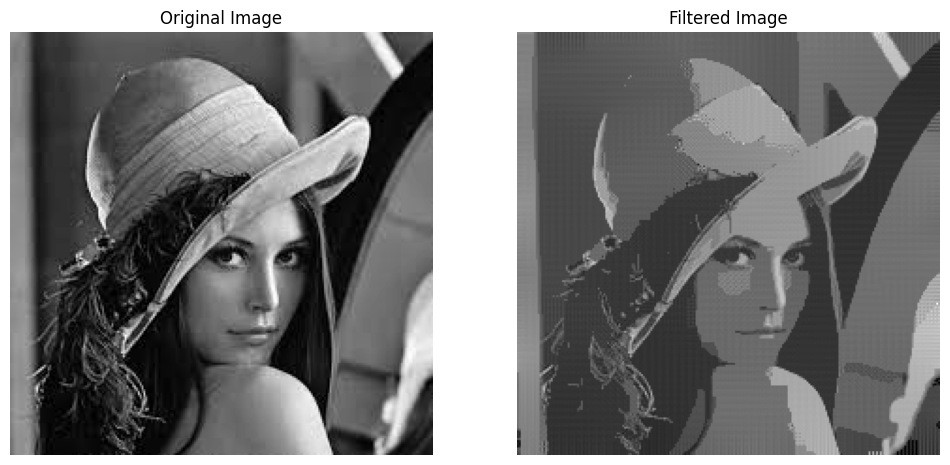

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve

def perona_malik(image, K, iterations, delta_t):
    # Convert the image to float
    image = image.astype(np.float32)

    # Initialize the output image
    output = image.copy()

    # Define the gradient operators
    gradient_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
    gradient_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])

    for _ in range(iterations):
        # Compute the gradients
        Ix = convolve(output, gradient_x)
        Iy = convolve(output, gradient_y)

        # Compute the gradient magnitude squared
        grad_mag_sq = Ix**2 + Iy**2

        # Compute the diffusion coefficient
        c = np.exp(-grad_mag_sq / (K**2))

        # Compute the divergence of the flux
        flux_x = c * Ix
        flux_y = c * Iy

        div_flux = convolve(flux_x, gradient_x) + convolve(flux_y, gradient_y)

        # Update the image
        output += delta_t * div_flux

    return output

# Load an example image (you can replace this with your own image)
image = plt.imread('lena_grey.jpeg')
print(image.ndim)
# Convert to grayscale if the image is in color
if image.ndim == 3:
    image = np.mean(image, axis=2)

# Parameters
K = 20
iterations = 500
delta_t = 0.1

# Apply Perona-Malik filtering
filtered_image = perona_malik(image, K, iterations, delta_t)

# Display the original and filtered images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Filtered Image')
plt.imshow(filtered_image, cmap='gray')
plt.axis('off')

plt.show()